In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Lecture 1 

- def of risk: 
- properties of distrecte RV
- CDF: $F_X(x) = P(X < x)$ General properties of CDF:
    - $\lim{x\to\infty} F_X(x) = 0$
    - $\lim{x\to-\infty} F_X(x) = 1$
    - $\forall x \le x' :\quad F_X(x) \le F_X(x')$

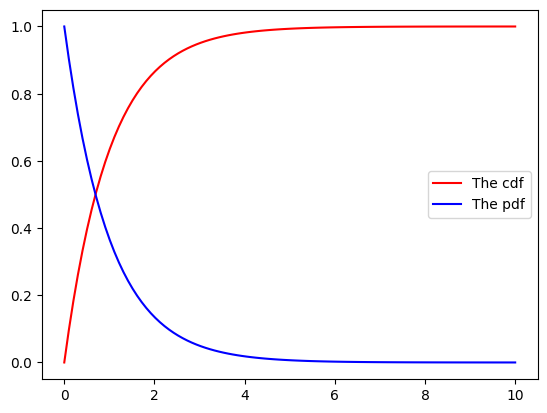

In [29]:
x = np.linspace(0, 10, 100)
expon_dist = stats.expon(scale = 1)
y = expon_dist.cdf(x)
y_1 = expon_dist.pdf(x)
plt.plot(x, y, color = 'r', label = 'The cdf')
plt.plot(x, y_1, color = 'b', label = 'The pdf')
plt.legend()
plt.show()

- Expectation
- Variance 
- SKewnwess
- Kurtosis

Distributions:
- poisson
- exponential
- gamma
- normal
- pareto

other topics:
- joint probabiliy
- conditional probability
- bayes theorm: $P(B \mid A) = \frac{P(A \cup B)}{P(A)}$

covariance and correlation

spearman correlation

multiple RV

Moment genarating function and Characteristic Function

# Lecture 2

## Stock returns

Def stock return over a period $k$: $R_t = \frac{S_t - S_{t-k}}{S_{t-k}}$

In [30]:
import yfinance as yf 

ticker = "AAPL"
start="2020-01-01"
end="2025-01-01"
data = yf.download(
    ticker,
    start = start,
    end = end,
    interval="1d",  
    auto_adjust=True 
)

data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400
2020-01-03,71.763718,72.523746,71.539330,71.696160,146322800
2020-01-06,72.335571,72.374177,70.634554,70.885487,118387200
2020-01-07,71.995354,72.600960,71.775789,72.345204,108872000
2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200


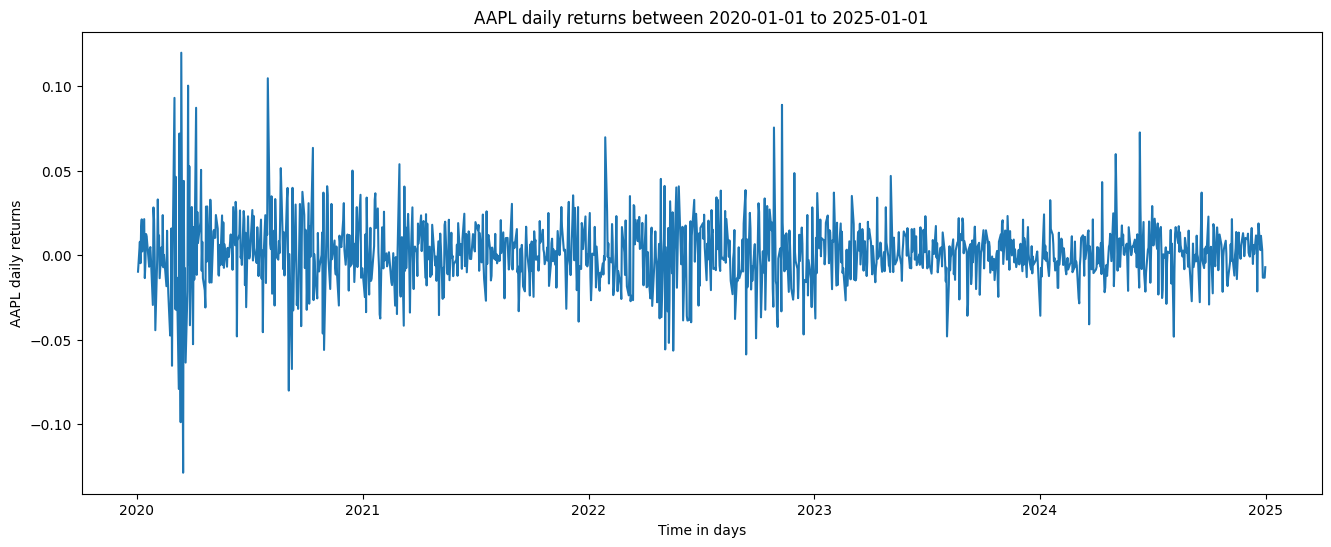

In [31]:
data['returns'] = data[('Close',ticker)].pct_change().dropna()
plt.figure(figsize = (16,6))
plt.plot(data.index, data['returns'])
plt.xlabel("Time in days") ; plt.ylabel(f"{ticker} daily returns")
plt.title(f"{ticker} daily returns between {start} to {end}", fontsize = 12)
plt.show()

In [37]:
returns = data['returns'].dropna().to_numpy()
print(returns.shape)
print(type(returns))

(1257,)
<class 'numpy.ndarray'>


In [38]:
mu = returns.mean()
sigma = returns.std()
minimum = returns.min()
maximum = returns.max()

print(f'mean: {mu} \nstd: {sigma} \nmin: {minimum} \nmax:{maximum}')

mean: 0.001182110527505857 
std: 0.019947727300015566 
min: -0.12864708646739198 
max:0.1198082628596786


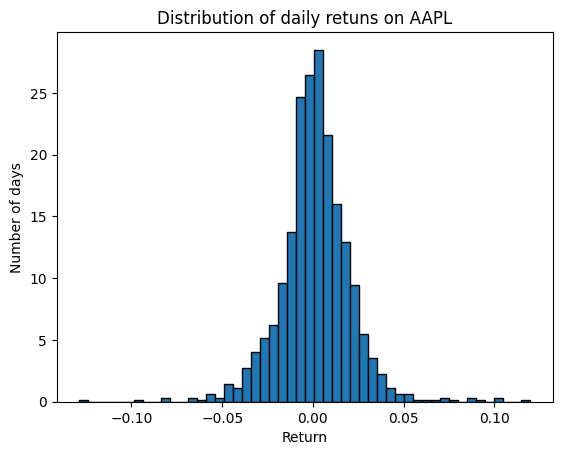

In [39]:
plt.hist(returns, density = True, bins = 50, edgecolor = 'black')
plt.title(f'Distribution of daily retuns on {ticker}')
plt.ylabel("Number of days")
plt.xlabel("Return")
plt.show()

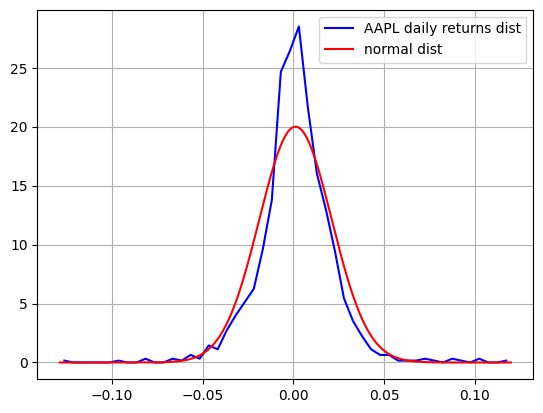

In [40]:
# retuns dist
count, bins = np.histogram(returns, bins = 50, density = True)
centers = 0.5* (bins[1:] + bins[:-1])
plt.plot(centers, count, color = 'b', label= f'{ticker} daily returns dist')

# the norm dist
normal = stats.norm(mu, sigma)
x = np.linspace(minimum, maximum, 300)
normal_pdf = normal.pdf(x)

plt.plot(x, normal_pdf, label = 'normal dist', color = 'red')
plt.grid()
plt.legend()
plt.show()

## Power Law on log-log scale -  $y = c \times x^\alpha$

In estimating a power-law tail, the parameter $\alpha$ is obtained directly from the slope of a log–log plot.

When fitting a **PDF**, the tail behaves as
$f(x) \propto x^{-(\alpha+1)}$.
Therefore the slope on the log–log plot equals $-(\alpha+1)$, and:

$\alpha = \text{slope} - 1$

When fitting a **CCDF**, the tail behaves as
$\bar F(x) = P(X > x) \propto x^{-\alpha}$.
Therefore the slope on the log–log plot equals $-\alpha$, and:

$\alpha = -\text{slope}$

CDF : $P(X\le a) = F_X(a)$

CCDF : $P(a<X) = \overline{F}_X(a)$

Empircal CCDF : $CCDF(X_i) = 1 - \frac{i}{N}$ Where: $N =$ len of data

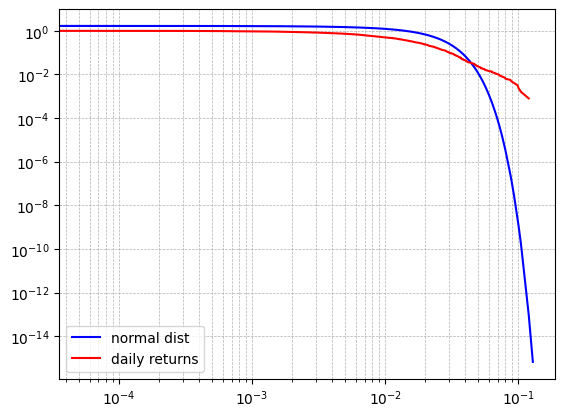

In [41]:
# Empiriccal CCDF
abs_r = np.sort(np.abs(returns))
n = len(abs_r)
emp_ccdf = np.ones(n) - np.arange(1, n+1) /n

#normal CCDF
norm_ccdf = 2 * (1 - stats.norm.cdf(abs_r, abs_r.mean(), abs_r.std()))

# log-log plot 
plt.loglog(abs_r, norm_ccdf, color = 'b', label = 'normal dist')
plt.loglog(abs_r[:-1], emp_ccdf[:-1], color = 'r', label = 'daily returns')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

> Link to linearegress function : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

**The function returns object with the following attributes:**
- slope

- intercept

- rvalue: The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination.

- pvalue: The p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic. See alternative above for alternative hypotheses.

- stderr: Standard error of the estimated slope (gradient), under the assumption of residual normality.

- intercept_stderr: Standard error of the estimated intercept, under the assumption of residual normality.

In [48]:
# Transform the data to log scale
log_x = np.log(abs_r)
log_y = np.log(emp_ccdf)

# pick only the tail the 5% of values exlude last elemnt
ntail = log_x[round(n*0.95):-1] 
vtail = log_y[round(n*0.95):-1] # The last element: = 1-n/n = 0 
                                 # and log(0) = -inf then the linear regresion wont work

# linear regression to find the slope
result = stats.linregress(ntail,vtail)

print(result.slope)

-3.0096905229020203


/var/folders/jt/w85x3rfd3cq6h1wyk8v8r3sm0000gn/T/ipykernel_79671/875268394.py:2: RuntimeWarning: divide by zero encountered in log
  log_x = np.log(abs_r)
/var/folders/jt/w85x3rfd3cq6h1wyk8v8r3sm0000gn/T/ipykernel_79671/875268394.py:3: RuntimeWarning: divide by zero encountered in log
  log_y = np.log(emp_ccdf)


**A tail exponent $ \alpha $ determines which statistical moments of a heavy-tailed distribution are defined:**

If $ \alpha < 1 $ → the mean is undefined.

If $ 1 < \alpha < 2 $ → the mean exists but the variance is undefined.

If $ \alpha > 2 $ → both mean and variance are finite, and the central limit theorem applies.

For a distribution of daily returns with $ \alpha > 2 $, the variance is finite, so adding many independent returns together will cause the sum (or average) to converge toward a normal distribution. The distribution becomes increasingly Gaussian as more samples are combined.

If the tail exponent is reduced by 1 (for example to $ \alpha = 1.4 $), then the variance becomes undefined and the central limit theorem no longer applies. In this case the distribution will not tend to normal when we combine many samples; the heavy tail dominates the behaviour.

In addition, a smaller tail exponent corresponds to a heavier tail, meaning extreme events are more frequent, while a larger tail exponent corresponds to a thinner tail and fewer extreme events.

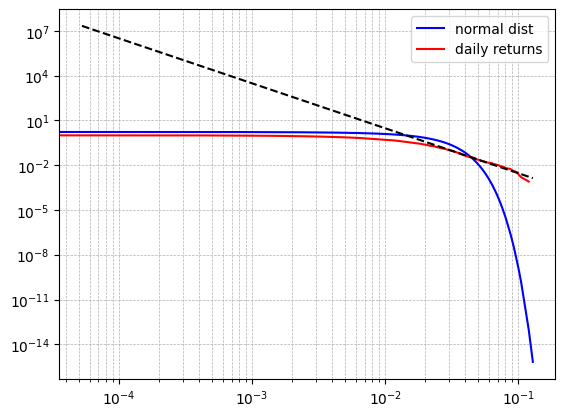

In [49]:
fit_y = result.slope*log_x + result.intercept

# log-log plot 
plt.loglog(abs_r, norm_ccdf, color = 'b', label = 'normal dist')
plt.loglog(abs_r[:-1], emp_ccdf[:-1], color = 'r', label = 'daily returns')
plt.loglog(np.exp(log_x), np.exp(fit_y), linestyle = '--', color = "black")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## More topics:
1) Chebyshev's Inequality
2) Combinations of Random Variables
    Mean-Square Law
    Convergence (Weak and Strong Laws of Large Numbers)
3) Central Limit Theorem
4) Berry - Essen Theorm
5) Maximum of Random Variables (Extreme Value Theory - Fisher-Tippet-Gnednko Theorem)
6) Sums of Random Variables — Introduction to Stable Distributions
    (location, scale, shape)
7) Form of Characteristic functions of Stable Distribution
8) Infinitely Divisible Random Variables
9) Maximum Likelihood Estimation (MLE)
10) Summary

# Lecture 3 - Risk Measures & Performance Metrics

##  **(Topic List)**

**1. Introduction to Risk Measures**

* Definition and purpose of risk measures
* Monetary, convex, and coherent risk measures
* Properties: monotonicity, translation invariance, homogeneity, sub-additivity

---

**2. Monetary Risk Measures**

* Formal definition of monetary risk measures
* Normalization and cash‐invariance
* Example: Value at Risk (VaR) as a monetary risk measure

---

**3. Value at Risk (VaR)**

* Definition of VaR and interpretation
* VaR using CDF and quantiles
* Tail behaviour and sensitivity to fat tails
* Numerical VaR examples:

  * Normal distribution
  * Cauchy distribution
  * Laplace (double exponential) distribution

---

**4. Convex Risk Measures**

* Definition and motivation
* Convexity vs. sub-additivity
* VaR’s failure of sub-additivity (counterexample with bonds)
* Conditions under which VaR becomes convex (elliptical distributions)

---

**5. Entropic Risk Measure**

* Definition via exponential utility
* Verification of monotonicity and translation invariance
* Quasi-convexity and full convexity
* Non-coherence: failure of homogeneity

---

**6. Coherent Risk Measures**

* Axioms:

  * Normalization
  * Monotonicity
  * Sub-additivity
  * Homogeneity
  * Translation invariance
* Relations: Coherent ⊂ Convex ⊂ Monetary

---

**7. Tail Conditional Expectation (TCE) / Expected Shortfall (ES)**

* Definition of TCE and ES
* Relationship between VaR and ES
* Continuous vs. discrete definitions
* Proof of coherence (including sub-additivity proof)
* Alternative integral representation of ES (“average of VaR”)
* Closed-form ES for double-exponential distribution

---

**8. Monte-Carlo Estimation of VaR & ES**

* Simulation procedure
* Sorting & empirical quantiles
* Numerical estimation of expected shortfall
* MATLAB example

---

**9. Performance Ratios**

Overview and comparisons between risk-adjusted performance measures:

* Sharpe Ratio
* Sortino Ratio
* Omega Ratio
* Treynor Ratio
* One-sided performance ratios

---

**10. Sharpe Ratio**

* Definition and interpretation
* Excess return over volatility
* Relationship to Brownian motion under real vs. risk-neutral measure
* Historical vs. projected Sharpe

---

**11. Sortino Ratio**

* Downside deviation vs. standard deviation
* Threshold-based downside risk
* Example calculation

---

**12. Omega Ratio**

* Definition via all moments of the distribution
* Interpretation as upside / downside ratio
* Equivalent integral and expectation forms

---

**13. One-Sided Performance Ratio**

* General formulation with (p,q) norms
* Special cases linking to Sortino and Omega

---

**14. Treynor Ratio**

* Excess return divided by beta
* Systematic risk vs. total volatility
* Market-based comparison measure

---

**15. Summary**

* VaR: Monetary but not convex
* Entropic risk: Convex but not coherent
* ES: Fully coherent
* Performance ratios: balancing return with different risk metrics

---


## Risk measures - Monetary risk measure

A monetary risk measure is a function $\rho: X \rightarrow \R \cup \infty$ that assigns a real number to a financial position $X$ (its future profit or loss) and behaves in a financially reasonable way.

**It must satisfy two properties:**

1) Monotonicity:
If one position always performs worse than another, its risk must be higher. Formally, if $X \le Y$ almost surely, then $\rho(X) \ge \rho(Y)$.
This ensures that “worse positions have greater risk”.

2) Translation invariance:
Adding a guaranteed cash amount $a$ to a position must reduce its risk by exactly $a$. Formally, $\rho(X + a) = \rho(X) - a$.
This captures the idea that safe cash offsets risk one-for-one.

In financial terms, a monetary risk measure expresses risk directly in money units and reacts correctly when cash is added or when positions are compared. A classic example is Value at Risk (VaR), which satisfies both monotonicity and translation invariance.

### **Monetary risk measure example : VaR (value at risk)**

The mathematical expression of var: $$\text{VaR}_X(\alpha) = -\inf{x \in \mathbb{R} \mid F_X(x) > 1 - \alpha}$$

Where $F_X(x)$ is the $CDF$ of the return $X$

We want the 99% VaR for a normal distribution $N(\mu, \sigma^2)$.

We solve for $x_\alpha$ such that:

$\displaystyle \int_{-\infty}^{x_\alpha} \frac{1}{\sqrt{2\pi}\sigma} e^{- \frac{(x-\mu)^2}{2\sigma^2}}, dx = 0.01$

Using the substitution $z = \frac{x-\mu}{\sigma}$:

$\displaystyle \int_{-\infty}^{x_\alpha} \frac{1}{\sqrt{2\pi}\sigma} e^{- \frac{(x-\mu)^2}{2\sigma^2}}, dx = \int_{-\infty}^{\frac{x_\alpha - \mu}{\sigma}} \frac{1}{\sqrt{2\pi}} e^{-z^2/2}, dz = \Phi!\left(\frac{x_\alpha - \mu}{\sigma}\right) = 0.01$

Thus:

$\displaystyle x_\alpha = \mu + \sigma \cdot \Phi^{-1}(0.01)$

And the VaR is:

$\displaystyle \text{VaR}_{0.99}(X) = -x\alpha = -\left(\mu + \sigma \cdot \Phi^{-1}(0.01)\right)$

In [71]:
# ----- parameters -----
mu = 0.0          # mean
sigma = 1.0       # standard deviation
alpha = 0.99      # 99% VaR
p = 1 - alpha     # 0.01 (left tail)
n_samples = 100000

K = np.random.default_rng(10)

# ----- 1. סימולציה של P&L -----
# X ~ N(mu, sigma^2)
X = K.normal(loc=mu, scale=sigma, size=n_samples)

# ----- 2. אמדן אמפירי של VaR -----
x_alpha = np.quantile(X, p)   # 1% quantile (left tail)
VaR_hat = -x_alpha          # VaR מוגדר עם מינוס

# ----- 3. VaR תיאורטי -----
VaR_theory = -(mu + sigma * stats.norm.ppf(p))

print(f"Empirical 99% VaR ≈ {VaR_hat:.4f}")
print(f"Theoretical 99% VaR ≈ {VaR_theory:.4f}")


Empirical 99% VaR ≈ 2.3385
Theoretical 99% VaR ≈ 2.3263


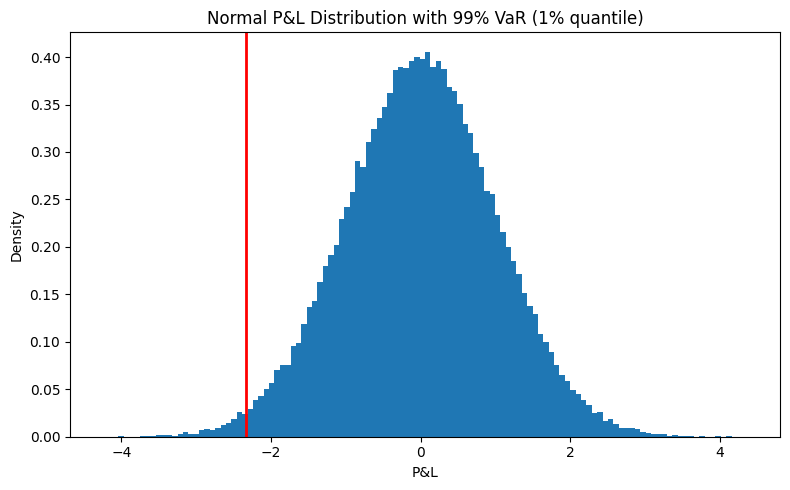

In [72]:
plt.figure(figsize=(8, 5))
plt.hist(X, bins=120, density=True)
plt.axvline(x=x_alpha, linewidth=2, color = 'r')  # vertical line at 1% quantile (loss side)

plt.title("Normal P&L Distribution with 99% VaR (1% quantile)")
plt.xlabel("P&L")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Empirical 99% VaR ≈ 1.9832
Theoretical 99% VaR ≈ 2.3263


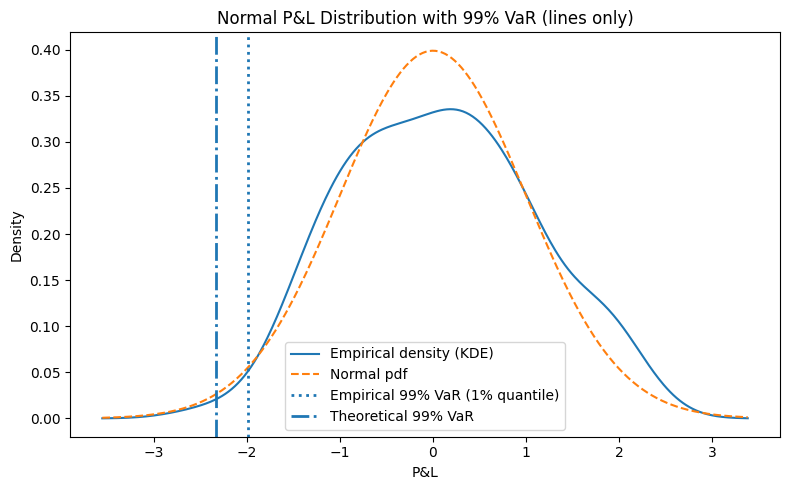

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# ----- parameters -----
mu = 0.0
sigma = 1.0
alpha = 0.99
p = 1 - alpha          # 0.01
n_samples = 200

np.random.seed(0)

# ----- simulate P&L -----
X = np.random.normal(loc=mu, scale=sigma, size=n_samples)

# ----- empirical VaR -----
x_alpha_emp = np.quantile(X, p)   # 1% quantile
VaR_emp = -x_alpha_emp

# ----- theoretical VaR -----
x_alpha_theo = mu + sigma * norm.ppf(p)   # same thing תיאורטי
VaR_theo = -x_alpha_theo

print(f"Empirical 99% VaR ≈ {VaR_emp:.4f}")
print(f"Theoretical 99% VaR ≈ {VaR_theo:.4f}")

# ----- build smooth curves -----
xs = np.linspace(X.min() - 1, X.max() + 1, 400)

# KDE אמפירי
kde = gaussian_kde(X)
pdf_emp = kde(xs)

# pdf תיאורטי
pdf_theo = norm.pdf(xs, loc=mu, scale=sigma)

# ----- plot -----
plt.figure(figsize=(8, 5))

# צפיפות אמפירית (קו)
plt.plot(xs, pdf_emp, label="Empirical density (KDE)")

# צפיפות נורמלית תיאורטית (קו)
plt.plot(xs, pdf_theo, linestyle="--", label="Normal pdf")

# קווים אנכיים ל-VaR (על P&L)
plt.axvline(x=x_alpha_emp, linestyle=":", linewidth=2,
            label="Empirical 99% VaR (1% quantile)")
plt.axvline(x=x_alpha_theo, linestyle="-.", linewidth=2,
            label="Theoretical 99% VaR")

plt.title("Normal P&L Distribution with 99% VaR (lines only)")
plt.xlabel("P&L")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


## Risk measures - Convex risk measure

A convex risk measure setesfay the monetary conditions (i.e monotonicity, translation invarince) and, in addition a convex condtion:
Def - risk measure $\rho$ is convex iif for two protfolios $X,Y$ and and for any rael number in $$\forall \lambda \in [0,1] : \rho(\lambda X +(1 - \lambda) Y) \le \lambda \rho(X) +(1-\lambda) \rho(Y)$$

> if the convexty risk measure is Homogeneous: $\lambda \rho(X) = \rho(\lambda X)$,the convexity requirements is becoming **Sub-additive**: $\rho(X+Y)\le \rho(X)+\rho(Y)$

$\frac{1 - \int_{-\infty}^{\alpha}F(x)dx}{\int_{-\infty}^{\alpha}F(x)dx}$

$\frac{1 - \int_{-\infty}^{\alpha}F(x)dx}{\int_{-\infty}^{\alpha}F(x)dx}$

$\frac{\int_{\alpha}^{\infty}F(x)dx}{\int_{-\infty}^{\alpha}F(x)dx}$

# Lecture 4 - protfolio aalocation

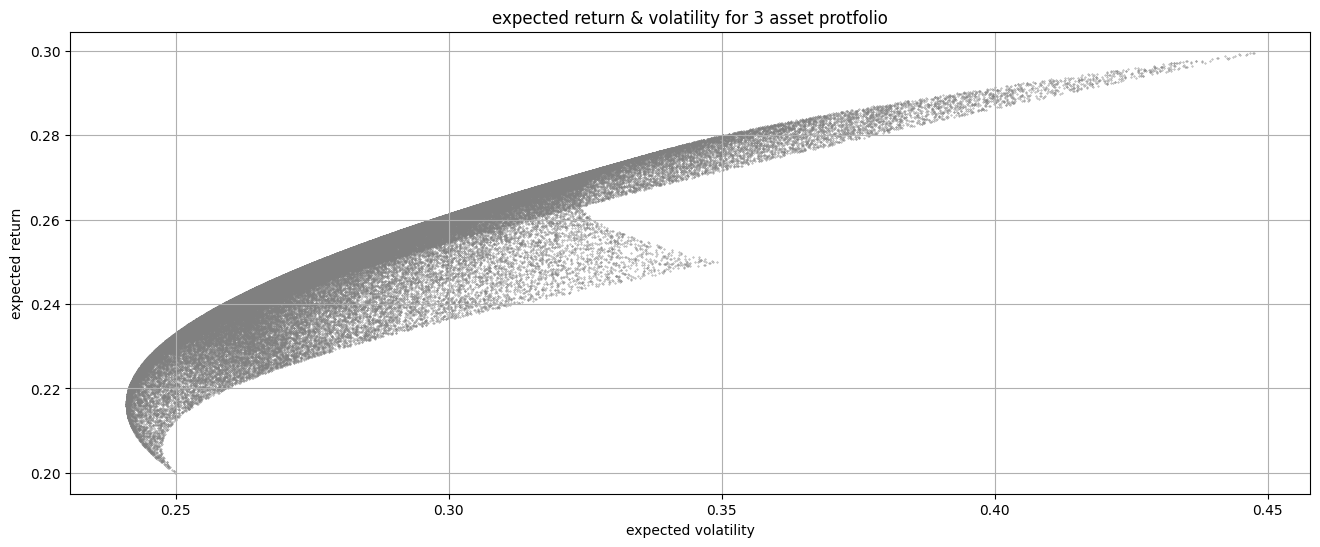

In [45]:
    
# 3 stocks protfolio plot

import numpy as np
import matplotlib.pyplot as plt

x = []
y = []

for i in range(10**5):
    w = np.ones(3)
    for i in range(3):
        wi = np.random.uniform(1,0)
        w[i] = wi
    t = sum(w)
    norm_w = np.array([i/t for i in w])

    r = np.array([0.25, 0.2, 0.3])
    sigma = np.array([0.35, 0.25, 0.45])
    rho = np.array([
        [1, 0.6, 0.4],
        [0.6, 1, 0.3],
        [0.4, 0.3, 1]])
    
    Sigma = np.outer(sigma, sigma) * rho
    vol = np.sqrt(norm_w @ Sigma @ norm_w)

    # expected return
    E_r = norm_w @ r
    y.append(E_r)

    # expected volatility 
    x.append(vol)
    
protfolio_sigma = np.array(x)
returns = np.array(y)

plt.figure(figsize = (16,6))
plt.scatter(protfolio_sigma, returns, s =0.1, color = 'grey')
plt.grid('--')
plt.title("expected return & volatility for 3 asset protfolio")
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()